In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score


In [2]:
# prod - датасет с добычей
# prod_gs - Дебит газа сепарации
# prod_sg - Дебит сухого газа
# prod_nk - Дебит нестабильного конденсата 
# prod_sk - Дебит стабильного конденсата
# prod_zd - Забойное давление
# prod_ud - Устьевое давление
# prod_temp - Устьевые температуры
prod_gs = pd.read_excel("Добыча.xlsx",  sheet_name = 1, index_col = 0)

prod_nk = pd.read_excel("Добыча.xlsx",  sheet_name = 2, index_col = 0)

prod_zd = pd.read_excel("Добыча.xlsx",  sheet_name = 3, index_col = 0)

prod_ud = pd.read_excel("Добыча.xlsx",  sheet_name = 4, index_col = 0)

prod_temp = pd.read_excel("Добыча.xlsx",  sheet_name = 5, index_col = 0)

prod_sg = pd.read_excel("Добыча.xlsx",  sheet_name = 6, index_col = 0)

prod_sk = pd.read_excel("Добыча.xlsx",  sheet_name = 7, index_col = 0)

In [3]:
# exp - датасет с исследованиями
# _gs - Дебит газа сепарации
# _nk - Дебит нестабильного конденсата 
# _sk - Дебит стабильного конденсата
# _zd - Забойное давление
# _ud - Устьевое давление
# _temp - Устьевые температуры
exp_gs = pd.read_excel("Исследования.xlsx",  sheet_name = 1, index_col = 0)

exp_nk = pd.read_excel("Исследования.xlsx",  sheet_name = 2, index_col = 0)

exp_zd = pd.read_excel("Исследования.xlsx",  sheet_name = 3, index_col = 0)

exp_ud = pd.read_excel("Исследования.xlsx",  sheet_name = 4, index_col = 0)

exp_temp = pd.read_excel("Исследования.xlsx",  sheet_name = 5, index_col = 0)

exp_sk = pd.read_excel("Исследования.xlsx",  sheet_name = 6, index_col = 0)

In [4]:
# prod - датасет с добычей
# prod_gs - Дебит газа сепарации
# prod_sg - Дебит сухого газа
# prod_nk - Дебит нестабильного конденсата 
# prod_sk - Дебит стабильного конденсата
# prod_zd - Забойное давление
# prod_ud - Устьевое давление
# prod_temp - Устьевые температуры
prod_gs_red = pd.DataFrame(prod_gs.stack().reset_index(drop=True)).rename(columns = {0:prod_gs.index.name})
prod_nk_red = pd.DataFrame(prod_nk.stack().reset_index(drop=True)).rename(columns = {0:prod_nk.index.name})
prod_zd_red = pd.DataFrame(prod_zd.stack().reset_index(drop=True)).rename(columns = {0:prod_zd.index.name})
prod_ud_red = pd.DataFrame(prod_ud.stack().reset_index(drop=True)).rename(columns = {0:prod_ud.index.name})
prod_temp_red =pd.DataFrame(prod_temp.stack().reset_index(drop=True)).rename(columns = {0:prod_temp.index.name})
prod_sg_red = pd.DataFrame(prod_sg.stack().reset_index(drop=True)).rename(columns = {0:prod_sg.index.name})
prod_sk_red = pd.DataFrame(prod_sk.stack().reset_index(drop=True)).rename(columns = {0:prod_sk.index.name})

In [5]:
df = pd.concat([prod_gs_red,prod_nk_red,prod_ud_red, prod_zd_red, prod_temp_red, prod_sg_red, prod_sk_red], axis = 1)
df

,"Дебит ГС, тыс.м3/сут","Дебит НК, т/сут","Устьевое давление, МПа",Р зб. МПа,"Устьевая температура, град С","Дебит СГ, тыс. м3/сут","Дебит СК, т/сут"
0,0.000000,0.000000,0.000000,0.000000,0.000000,578.965468,158.651396
1,0.000000,0.000000,0.000000,0.000000,0.000000,504.696777,138.299877
2,0.000000,0.000000,0.000000,0.000000,0.000000,574.674379,157.475530
3,0.000000,0.000000,0.000000,0.000000,0.000000,355.349136,97.374789
4,0.000000,0.000000,0.000000,0.000000,0.000000,405.883397,111.222471
...,...,...,...,...,...,...,...
2875,459.561335,164.991028,32.655298,43.410127,66.916793,NaN,NaN
2876,476.173583,102.219023,28.542104,44.238570,65.295532,NaN,NaN
2877,499.312128,NaN,26.619309,40.445921,66.735564,NaN,NaN
2878,279.494163,NaN,27.871955,37.154765,66.715914,NaN,NaN


In [6]:
df.info() #судя по всему для 1000 "строк" просто не замеряли дебиты СГ и СК, 
#но скважины работали, так что не буду уделять строки с пропусками в этих столбцах. А там где пропущен НК можно удалить строки, их 3 всего

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Дебит ГС, тыс.м3/сут          2880 non-null   float64
 1   Дебит НК, т/сут               2877 non-null   float64
 2   Устьевое давление, МПа        2880 non-null   float64
 3   Р зб. МПа                     2880 non-null   float64
 4   Устьевая температура, град С  2880 non-null   float64
 5   Дебит СГ, тыс. м3/сут         1803 non-null   float64
 6   Дебит СК, т/сут               1805 non-null   float64
dtypes: float64(7)
memory usage: 157.6 KB


In [7]:
df.describe()

,"Дебит ГС, тыс.м3/сут","Дебит НК, т/сут","Устьевое давление, МПа",Р зб. МПа,"Устьевая температура, град С","Дебит СГ, тыс. м3/сут","Дебит СК, т/сут"
count,2880.000000,2877.000000,2880.000000,2880.000000,2880.000000,1803.000000,1805.000000
mean,241.118148,86.284550,21.287640,28.413781,39.308473,414.064701,109.440250
std,205.389030,74.084400,16.947053,22.657178,30.867645,116.050651,32.882957
min,0.000000,0.000000,0.000000,0.000000,0.000000,60.035200,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,347.166264,86.458716
50%,305.610830,104.332642,29.713215,40.870567,59.439569,414.126065,107.068386
75%,409.460396,146.929228,35.939602,47.788197,65.993056,488.152210,130.448421
max,733.824507,328.583202,43.550000,56.452937,91.011864,782.716103,262.471132


У нас будет еще задача заполнения пропущенных значений, но сперва разберемся с моделью, так что на данном этапе все строки с нулями в столбце Температура я удаляю, они будут только мешать

In [8]:
len(df[df['Устьевая температура, град С']==0]) #очень много нулевых значений, как вариант - заменить, а не уделять. Нужно погуглить как лучше..

1077

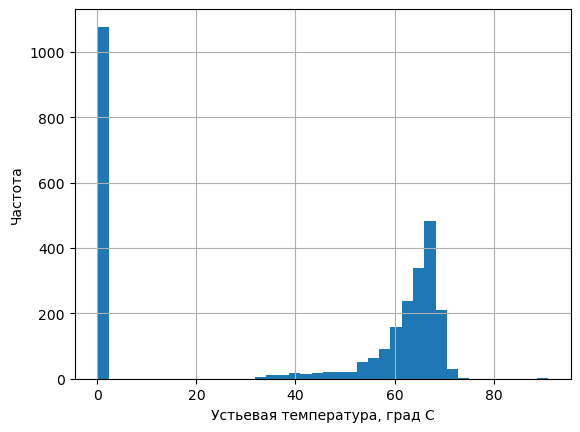

In [9]:
df['Устьевая температура, град С'].hist(bins=40)
plt.xlabel('Устьевая температура, град С')
plt.ylabel('Частота')
plt.show()

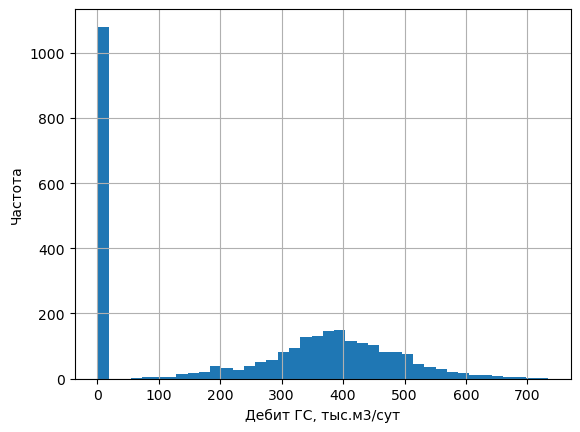

In [10]:
df['Дебит ГС, тыс.м3/сут'].hist(bins=40) #нулей больше чем всего остального, пока - удаляю
plt.xlabel('Дебит ГС, тыс.м3/сут')
plt.ylabel('Частота')
plt.show()

In [11]:
df = df.loc[df['Дебит ГС, тыс.м3/сут']!=0]
df = df.loc[df['Дебит НК, т/сут']!=0]
df = df.loc[df['Устьевое давление, МПа']!=0]
df = df.loc[df['Р зб. МПа']!=0]
df = df.loc[df['Устьевая температура, град С']!=0]
df.info

<bound method DataFrame.info of       Дебит ГС, тыс.м3/сут  Дебит НК, т/сут  Устьевое давление, МПа  \
8               549.039581       232.075458               37.740000   
9               478.609760       202.305231               35.660000   
10              544.970302       230.355401               36.780000   
25              336.981675       142.439962               39.160000   
26              384.903888       162.696369               37.170000   
...                    ...              ...                     ...   
2875            459.561335       164.991028               32.655298   
2876            476.173583       102.219023               28.542104   
2877            499.312128              NaN               26.619309   
2878            279.494163              NaN               27.871955   
2879            327.431318              NaN               25.723542   

      Р зб. МПа  Устьевая температура, град С  Дебит СГ, тыс. м3/сут  \
8     52.126123                     65.8700

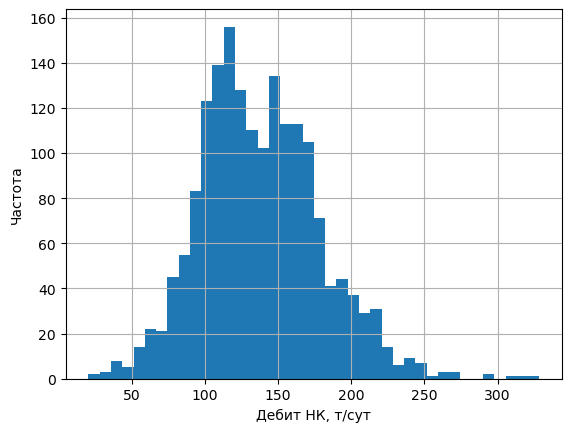

In [12]:
df['Дебит НК, т/сут'].hist(bins=40) 
plt.xlabel('Дебит НК, т/сут')
plt.ylabel('Частота')
plt.show()

In [13]:
#df.insert(loc=df.columns.get_loc('Р зб. МПа')+1, column='Рзаб-Руст', value=(df['Р зб. МПа'] - df['Устьевое давление, МПа']))

In [14]:
#df['Рзаб-Руст'].hist(bins=40)#судя по кличеству отрицательных значение - в значениях Рзаб много нулей, эх...
#plt.xlabel('Рзаб-Руст')
#plt.ylabel('Частота')
#plt.show()

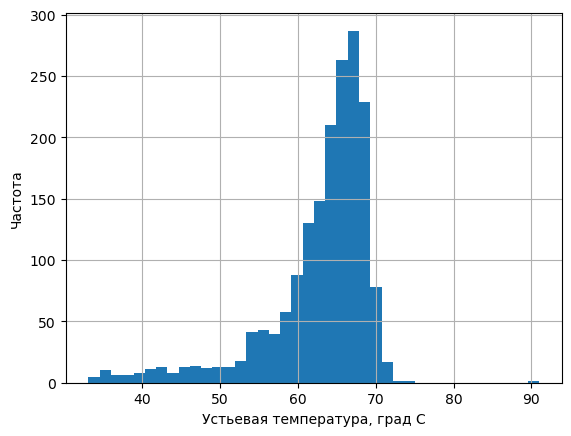

In [15]:
df['Устьевая температура, град С'].hist(bins=40)#есть ассиметрия, хвост слева, это вроде отрицательная ассиметрия. оценим ее количественно
plt.xlabel('Устьевая температура, град С')
plt.ylabel('Частота')
plt.show()

In [16]:
df['Устьевая температура, град С'].skew()

-1.864604490016999

чтобы смягчить ассиметрию - берем логарифм температуры 

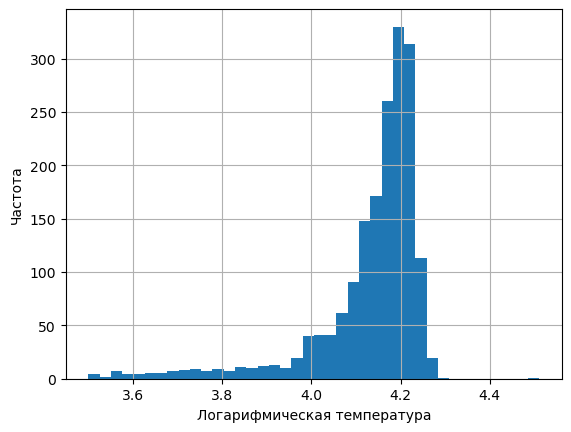

In [17]:
df['Устьевая температура, град С'].apply(np.log).hist(bins=40)
plt.xlabel('Логарифмическая температура')
plt.ylabel('Частота')
plt.show()

не сработало)))

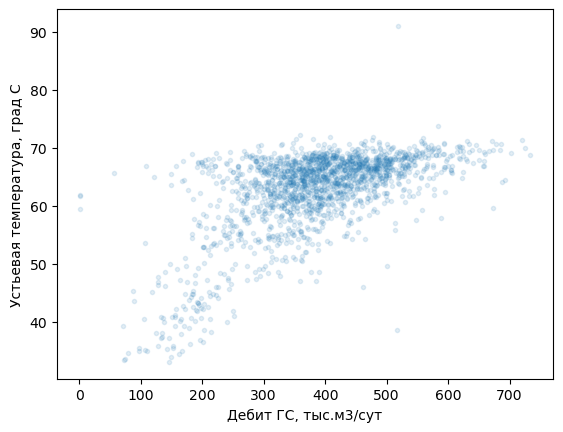

In [18]:
xs = df['Дебит ГС, тыс.м3/сут']
ys = df['Устьевая температура, град С']
plt.plot(xs, ys, 'o', alpha=0.12, markersize=3)
#pd.DataFrame(np.array([xs, ys]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('Дебит ГС, тыс.м3/сут')
plt.ylabel('Устьевая температура, град С')
plt.show()

Дрожание - это добавление случайного шума к данным для предотвращения перекрытия статистических графиков. Если непрерывное измерение округлено до некоторой удобной единицы, может произойти перекрытие. Это приводит к превращению непрерывной переменной в дискретную порядковую переменную. Например, возраст измеряется в годах, а масса тела - в фунтах или килограммах. Если вы построите диаграмму разброса веса в зависимости от возраста для достаточно большой выборки людей, там может быть много людей, записанных, скажем, с 29 годами и 70 кг, и, следовательно, в этой точке будет нанесено много маркеров (29, 70).

Чтобы уменьшить перекрытие, вы можете добавить к данным небольшой случайный шум. Размер шума часто выбирается равным ширине единицы измерения. Например, к значению 70 кг вы можете добавить количество u , где u - равномерная случайная величина в интервале [-0,5, 0,5]. Вы можете обосновать дрожание, предположив, что истинный вес человека весом 70 кг с равной вероятностью находится в любом месте интервала [69,5, 70,5].

Контекст данных важен при принятии решения о дрожании. Например, возраст обычно округляется в меньшую сторону: 29-летний человек может праздновать свой 29-й день рождения сегодня или, возможно, ему исполнится 30 завтра, но ей все равно 29 лет. Следовательно, вы можете изменить возраст, добавив величину v , где v - равномерная случайная величина в интервале [0,1]. (Мы игнорируем статистически значимый случай женщин, которым остается 29 лет в течение многих лет!)

Источник: Jittering to prevent overplotting in statistical graphics
https://dfedorov.spb.ru/pandas/downey/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D1%83%D0%B5%D0%BC%20%D0%BE%D1%82%D0%BD%D0%BE%D1%88%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83%20%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8.html

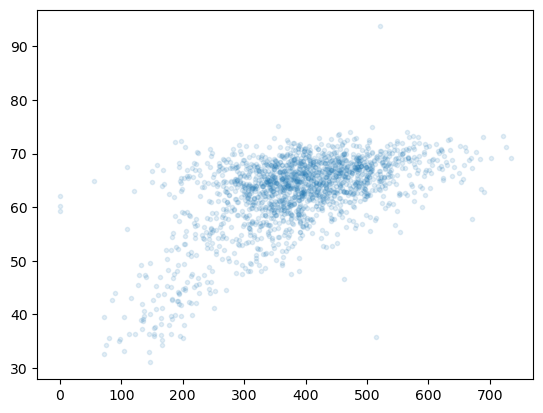

In [19]:
noise = np.random.normal(0, 2, size=len(df))
xs_jitter = xs + noise
ys_jitter = ys + noise
plt.plot(xs_jitter, ys_jitter, 'o', alpha=0.12, markersize=3)

In [20]:
print(df.describe())

       Дебит ГС, тыс.м3/сут  Дебит НК, т/сут  Устьевое давление, МПа  \
count           1785.000000      1782.000000             1785.000000   
mean             385.730575       137.648573               33.972759   
std              108.951757        41.102735                5.107245   
min                0.532846        20.363964               17.387591   
25%              323.395321       108.775874               30.407000   
50%              386.878721       134.355240               34.546429   
75%              455.704747       163.911125               38.257333   
max              733.824507       328.583202               43.409667   

         Р зб. МПа  Устьевая температура, град С  Дебит СГ, тыс. м3/сут  \
count  1785.000000                   1785.000000             809.000000   
mean     45.755634                     62.840863             400.517533   
std       5.688288                      6.854298             109.005050   
min      25.222170                     33.117857   

In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1785 entries, 8 to 2879
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Дебит ГС, тыс.м3/сут          1785 non-null   float64
 1   Дебит НК, т/сут               1782 non-null   float64
 2   Устьевое давление, МПа        1785 non-null   float64
 3   Р зб. МПа                     1785 non-null   float64
 4   Устьевая температура, град С  1785 non-null   float64
 5   Дебит СГ, тыс. м3/сут         809 non-null    float64
 6   Дебит СК, т/сут               811 non-null    float64
dtypes: float64(7)
memory usage: 111.6 KB
None


In [22]:
del df['Дебит СГ, тыс. м3/сут']
del df['Дебит СК, т/сут']
del df['Дебит НК, т/сут']
#del df['Рзаб-Руст']
df.dropna()


,"Дебит ГС, тыс.м3/сут","Устьевое давление, МПа",Р зб. МПа,"Устьевая температура, град С"
8,549.039581,37.740000,52.126123,65.870000
9,478.609760,35.660000,49.915849,63.130000
10,544.970302,36.780000,53.028176,67.760000
25,336.981675,39.160000,52.759060,65.140000
26,384.903888,37.170000,50.511447,65.520000
...,...,...,...,...
2875,459.561335,32.655298,43.410127,66.916793
2876,476.173583,28.542104,44.238570,65.295532
2877,499.312128,26.619309,40.445921,66.735564
2878,279.494163,27.871955,37.154765,66.715914


In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1785 entries, 8 to 2879
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Дебит ГС, тыс.м3/сут          1785 non-null   float64
 1   Устьевое давление, МПа        1785 non-null   float64
 2   Р зб. МПа                     1785 non-null   float64
 3   Устьевая температура, град С  1785 non-null   float64
dtypes: float64(4)
memory usage: 69.7 KB
None


In [24]:
X=df.iloc[:, 0:2]
y=df.iloc[:,3].values
sc=MinMaxScaler()
Xnorm=pd.DataFrame(data=sc.fit_transform(X))
yshape=pd.DataFrame(data=y.reshape(-1,1))
ynorm=pd.DataFrame(data=sc.fit_transform(yshape))

In [25]:
print(df.describe())

       Дебит ГС, тыс.м3/сут  Устьевое давление, МПа    Р зб. МПа  \
count           1785.000000             1785.000000  1785.000000   
mean             385.730575               33.972759    45.755634   
std              108.951757                5.107245     5.688288   
min                0.532846               17.387591    25.222170   
25%              323.395321               30.407000    41.866003   
50%              386.878721               34.546429    46.128716   
75%              455.704747               38.257333    50.476784   
max              733.824507               43.409667    56.452937   

       Устьевая температура, град С  
count                   1785.000000  
mean                      62.840863  
std                        6.854298  
min                       33.117857  
25%                       61.040323  
50%                       64.877857  
75%                       67.209677  
max                       91.011864  


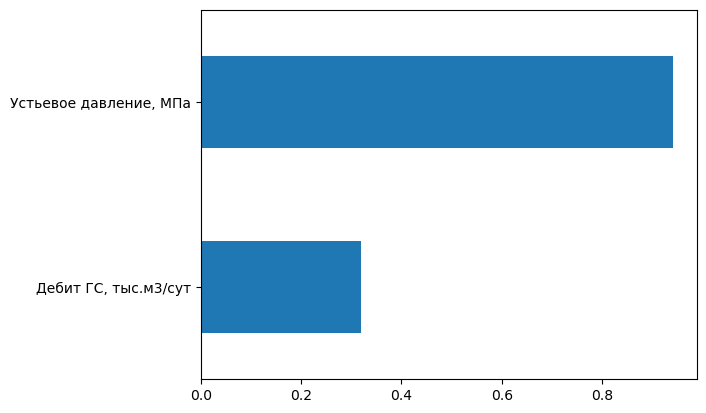

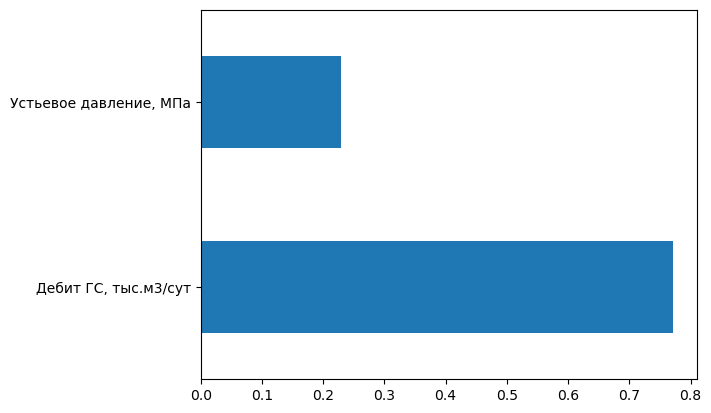

In [29]:
# “Spearman’s Rank Correlation” feature ranking
datanorm=sc.fit_transform(df)
stats.spearmanr(df)
rho, pval=stats.spearmanr(datanorm)
corr=pd.Series(rho[:2, 2], index=X.columns)
corr.plot(kind='barh')
plt.show()
# “Random Forest” feature ranking
model=RandomForestRegressor(max_depth=5, random_state=0)
model.fit(X,y)
feat_importances=pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(3).plot(kind='barh')
plt.show()

In [30]:
import numpy as np
seed=50
np.random.seed(seed)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(Xnorm, ynorm,
test_size=0.3)
from sklearn.neural_network import MLPRegressor
np.random.seed(seed)
clf=MLPRegressor(hidden_layer_sizes=(7), activation='tanh', 
solver='lbfgs', alpha=1,
learning_rate_init=0.1, max_iter=200,
random_state=None, tol=0.01)
y_train_Ravel=y_train.values.ravel()
clf.fit(X_train,y_train_Ravel)

MLPRegressor(activation='tanh', alpha=1, hidden_layer_sizes=7,
             learning_rate_init=0.1, solver='lbfgs', tol=0.01)